This database contains 76 attributes, but all published experiments
refer to using a subset of 14 of them.  In particular, the Cleveland
database is the only one that has been used by ML researchers to 
this date.  The "goal" field refers to the presence of heart disease
in the patient.  It is integer valued from 0 (no presence) to 

# Heart Disease Databases

## Introduction

### Background Infromation 
* This database contains 76 attributes, but all published experiments
  refer to using a subset of 14 of them.  In particular, the Cleveland
  database is the only one that has been used by ML researchers to 
  this date. All the attributes contain data that may be related to heart disease  

### Question 
* We will try to predict the value of heart disease(values 0 - 4, where 0 means no presence of heart disease)

### Dataset Description

* The Dataset we are using is the cleveland proccessed data that contains data which is already in a tidy format.   out of the 14 columns we are going to use age ,chol , restecg ,cp ,num . As these show close relation with      eachother or with num(value of heart disease

  


In [26]:
# load libs, read data from web, tidy
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

heart_disease_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data <- read_csv(heart_disease_url, col_names = col_names) %>% 
                        select(age,chol,restecg,cp ,num) %>%
                        mutate(restecg=as.factor(restecg),cp=as.factor(cp),num=as.factor(num))
head(heart_data, 5)

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,chol,restecg,cp,num
<dbl>,<dbl>,<fct>,<fct>,<fct>
63,233,2,1,0
67,286,2,4,2
67,229,2,4,1
37,250,0,3,0
41,204,2,2,0


In [30]:
# data summarize
count_cp <- group_by(heart_data,cp) %>%
            summarize(n = n())
count_cp

count_restecg <- group_by(heart_data,restecg) %>%
            summarize(n = n())
count_restecg  

count_num <- group_by(heart_data,num) %>%
            summarize(n = n())
count_num       

`summarise()` ungrouping output (override with `.groups` argument)



cp,n
<fct>,<int>
1,23
2,50
3,86
4,144


`summarise()` ungrouping output (override with `.groups` argument)



restecg,n
<fct>,<int>
0,151
1,4
2,148


`summarise()` ungrouping output (override with `.groups` argument)



num,n
<fct>,<int>
0,164
1,55
2,36
3,35
4,13


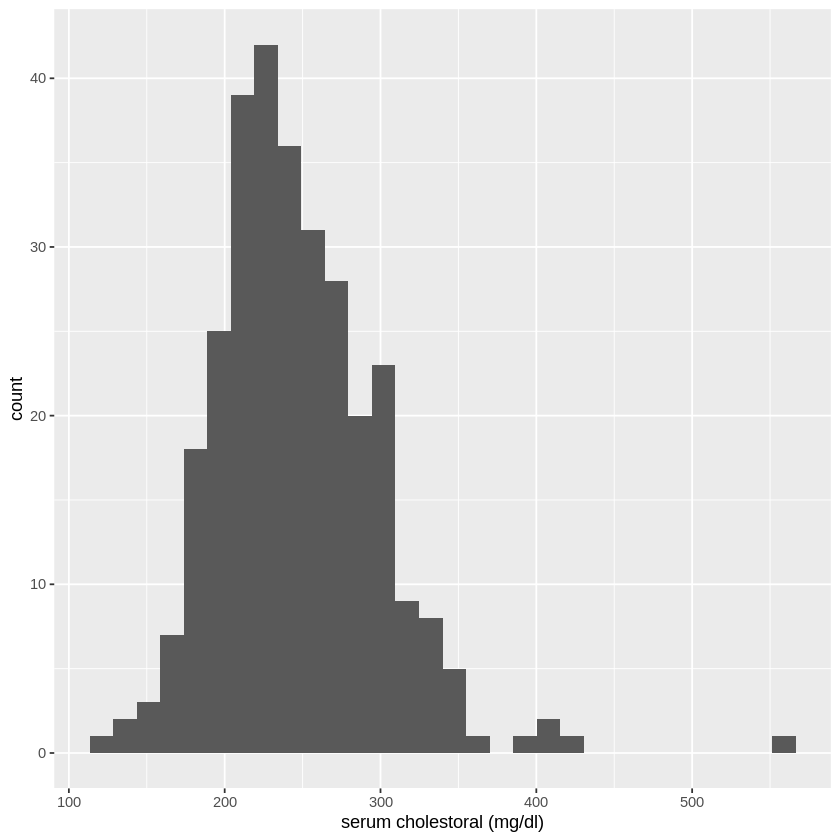

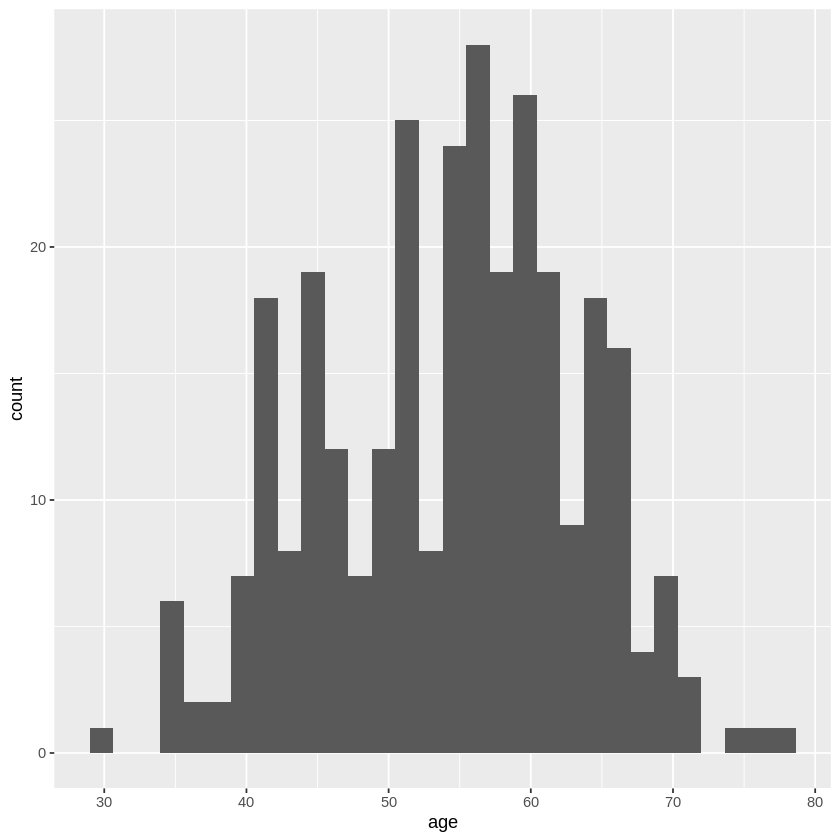

In [31]:
chol_plot <- ggplot(heart_data,  aes(x = chol)) +
    geom_histogram(bins=30) +
    xlab("serum cholestoral (mg/dl)")
    
chol_plot

age_plot <- ggplot(heart_data,  aes(x = age)) +
    geom_histogram(bins=30)
    
age_plot

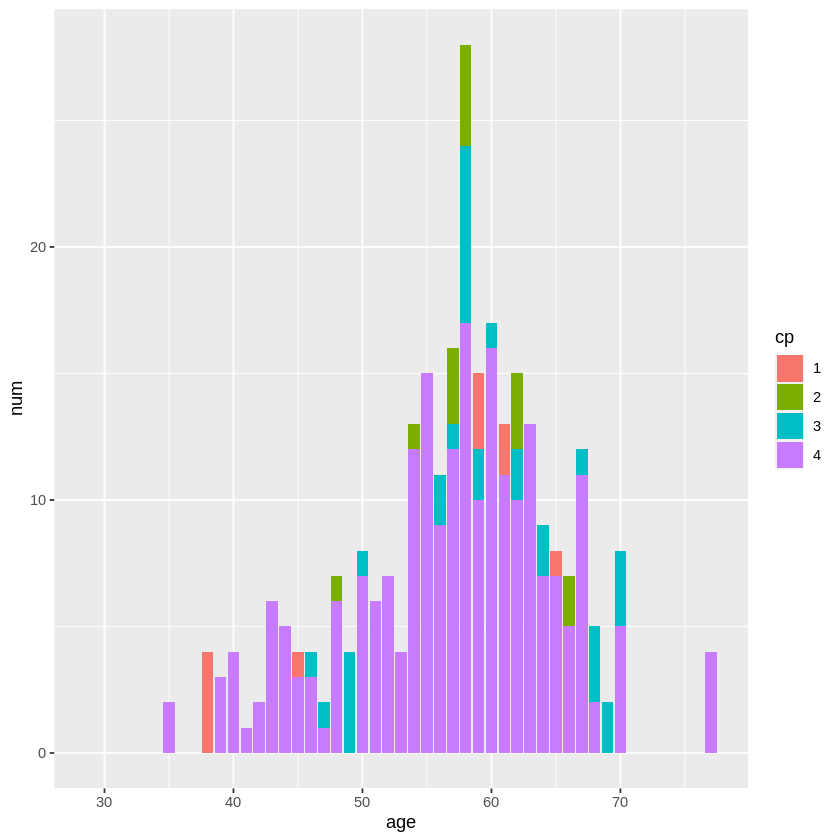

In [127]:

heart_plot <- ggplot(heart_data ,  aes(x = age ,y= num , fill = cp )) +
    geom_bar(stat="identity") 
    
    
heart_plot


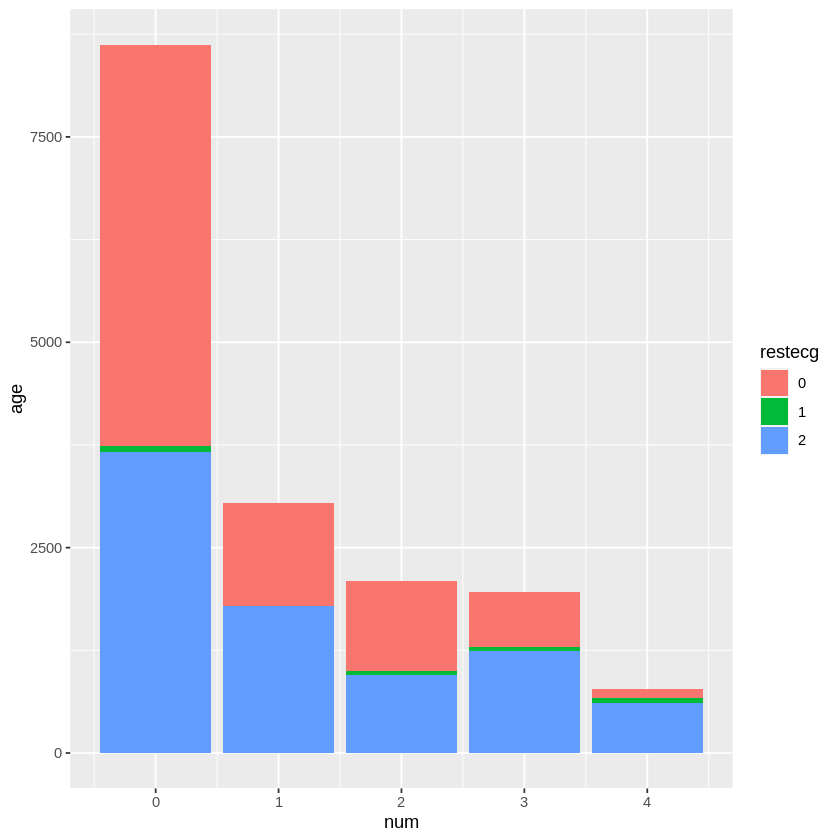

In [128]:
heart_plot2 <- ggplot(heart_data ,  aes(x = num , y = age , fill = restecg )) +
    geom_bar(stat="identity") 
heart_plot2